In [21]:
# DATA PREP STEP
# Source: https://www.kaggle.com/code/angieashraf/eda-breast-histopathology
# Source: https://www.kaggle.com/code/allunia/breast-cancer/notebook

In [22]:
# imports
import os , glob 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage.io import imread , imread_collection 

from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

import keras
from keras.applications import mobilenet
from keras.layers import Dense ,Dropout
from keras.models import Sequential

In [23]:
from os import listdir

In [24]:
os.path.dirname(os.path.realpath("idc")) # get path to idc images

'/Users/taylorbostick/Desktop/DS340W/term_project'

In [25]:
files = listdir("/Users/taylorbostick/Desktop/DS340W/term_project/data/idc/archive/")
len(files)

281

In [26]:
files[0:10] # peek at first 10 folders

['9036',
 '10268',
 '10257',
 '8913',
 '13613',
 '8914',
 '15510',
 '10259',
 '16165',
 '10292']

In [27]:
# get patient ids
files = listdir("/Users/taylorbostick/Desktop/DS340W/term_project/data/idc/archive/IDC_regular_ps50_idx5/")
len(files)

# NOTE: Each patient has an individual subfolder that contains image patches

279

In [28]:
# get total count of patients
base_path = "/Users/taylorbostick/Desktop/DS340W/term_project/data/idc/archive/IDC_regular_ps50_idx5/"
len(listdir(base_path))

# NOTE: Total patient population = 279
# This is small for deep learning,so we will need to be conscious of overfitting on this dataset

279

In [29]:
# get total count of idc image patches
image_count = 0

for i in range(len(listdir(base_path))):
    patient_id = listdir(base_path)[i]
               
    for j in [0, 1]:
        patient_path = base_path + patient_id 
        class_path = patient_path + "/" + str(j) + "/"
        subfiles = listdir(class_path)
        image_count += len(subfiles)
        
image_count

277524

In [30]:
# store image path, patient id, and target for each patient
df = pd.DataFrame(index = np.arange(0, image_count), columns = ["patient_id", "path", "diagnosis"])

n = 0
for i in range(len(listdir(base_path))):
    patient_id = listdir(base_path)[i]
    patient_path = base_path + patient_id 
    for j in [0,1]:
        class_path = patient_path + "/" + str(j) + "/"
        subfiles = listdir(class_path)
        for k in range(len(subfiles)):
            image_path = subfiles[k]
            df.iloc[n]["path"] = class_path + image_path
            df.iloc[n]["diagnosis"] = j
            df.iloc[n]["patient_id"] = patient_id
            n += 1  


In [31]:
df.head()

,patient_id,path,diagnosis
0,9036,/Users/taylorbostick/Desktop/DS340W/term_proje...,0
1,9036,/Users/taylorbostick/Desktop/DS340W/term_proje...,0
2,9036,/Users/taylorbostick/Desktop/DS340W/term_proje...,0
3,9036,/Users/taylorbostick/Desktop/DS340W/term_proje...,0
4,9036,/Users/taylorbostick/Desktop/DS340W/term_proje...,0


In [32]:
# EDA STEP

In [33]:
# get class counts of diagnosis
df['diagnosis'].value_counts()

# Over half of the data is classified as noncancerous
# This is a potential class imbalance problem
# Possible solutions include resampling specific cases and merging near identical cases

0    198738
1     78786
Name: diagnosis, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


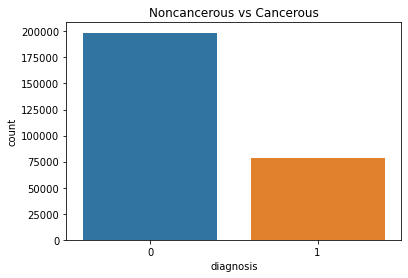

In [34]:
# plot class distribution for diagnosis
class_count = df['diagnosis'].value_counts()

sns.countplot(df['diagnosis'])
plt.title('Noncancerous vs Cancerous')

plt.show()

In [35]:
print('There are' + ' ' + str(class_count[0]-class_count[1]) + ' ' + 'more malignant cases than there are benign')

There are 119952 more malignant cases than there are benign


In [38]:
df.to_csv(r"/Users/taylorbostick/Desktop/DS340W/term_project/data/image_path_and_diagnosis_by_patient.csv", index = False)

In [39]:
# To do next:
    # address class imbalance